In [ ]:
!pip install opencv-python albumentations matplotlib


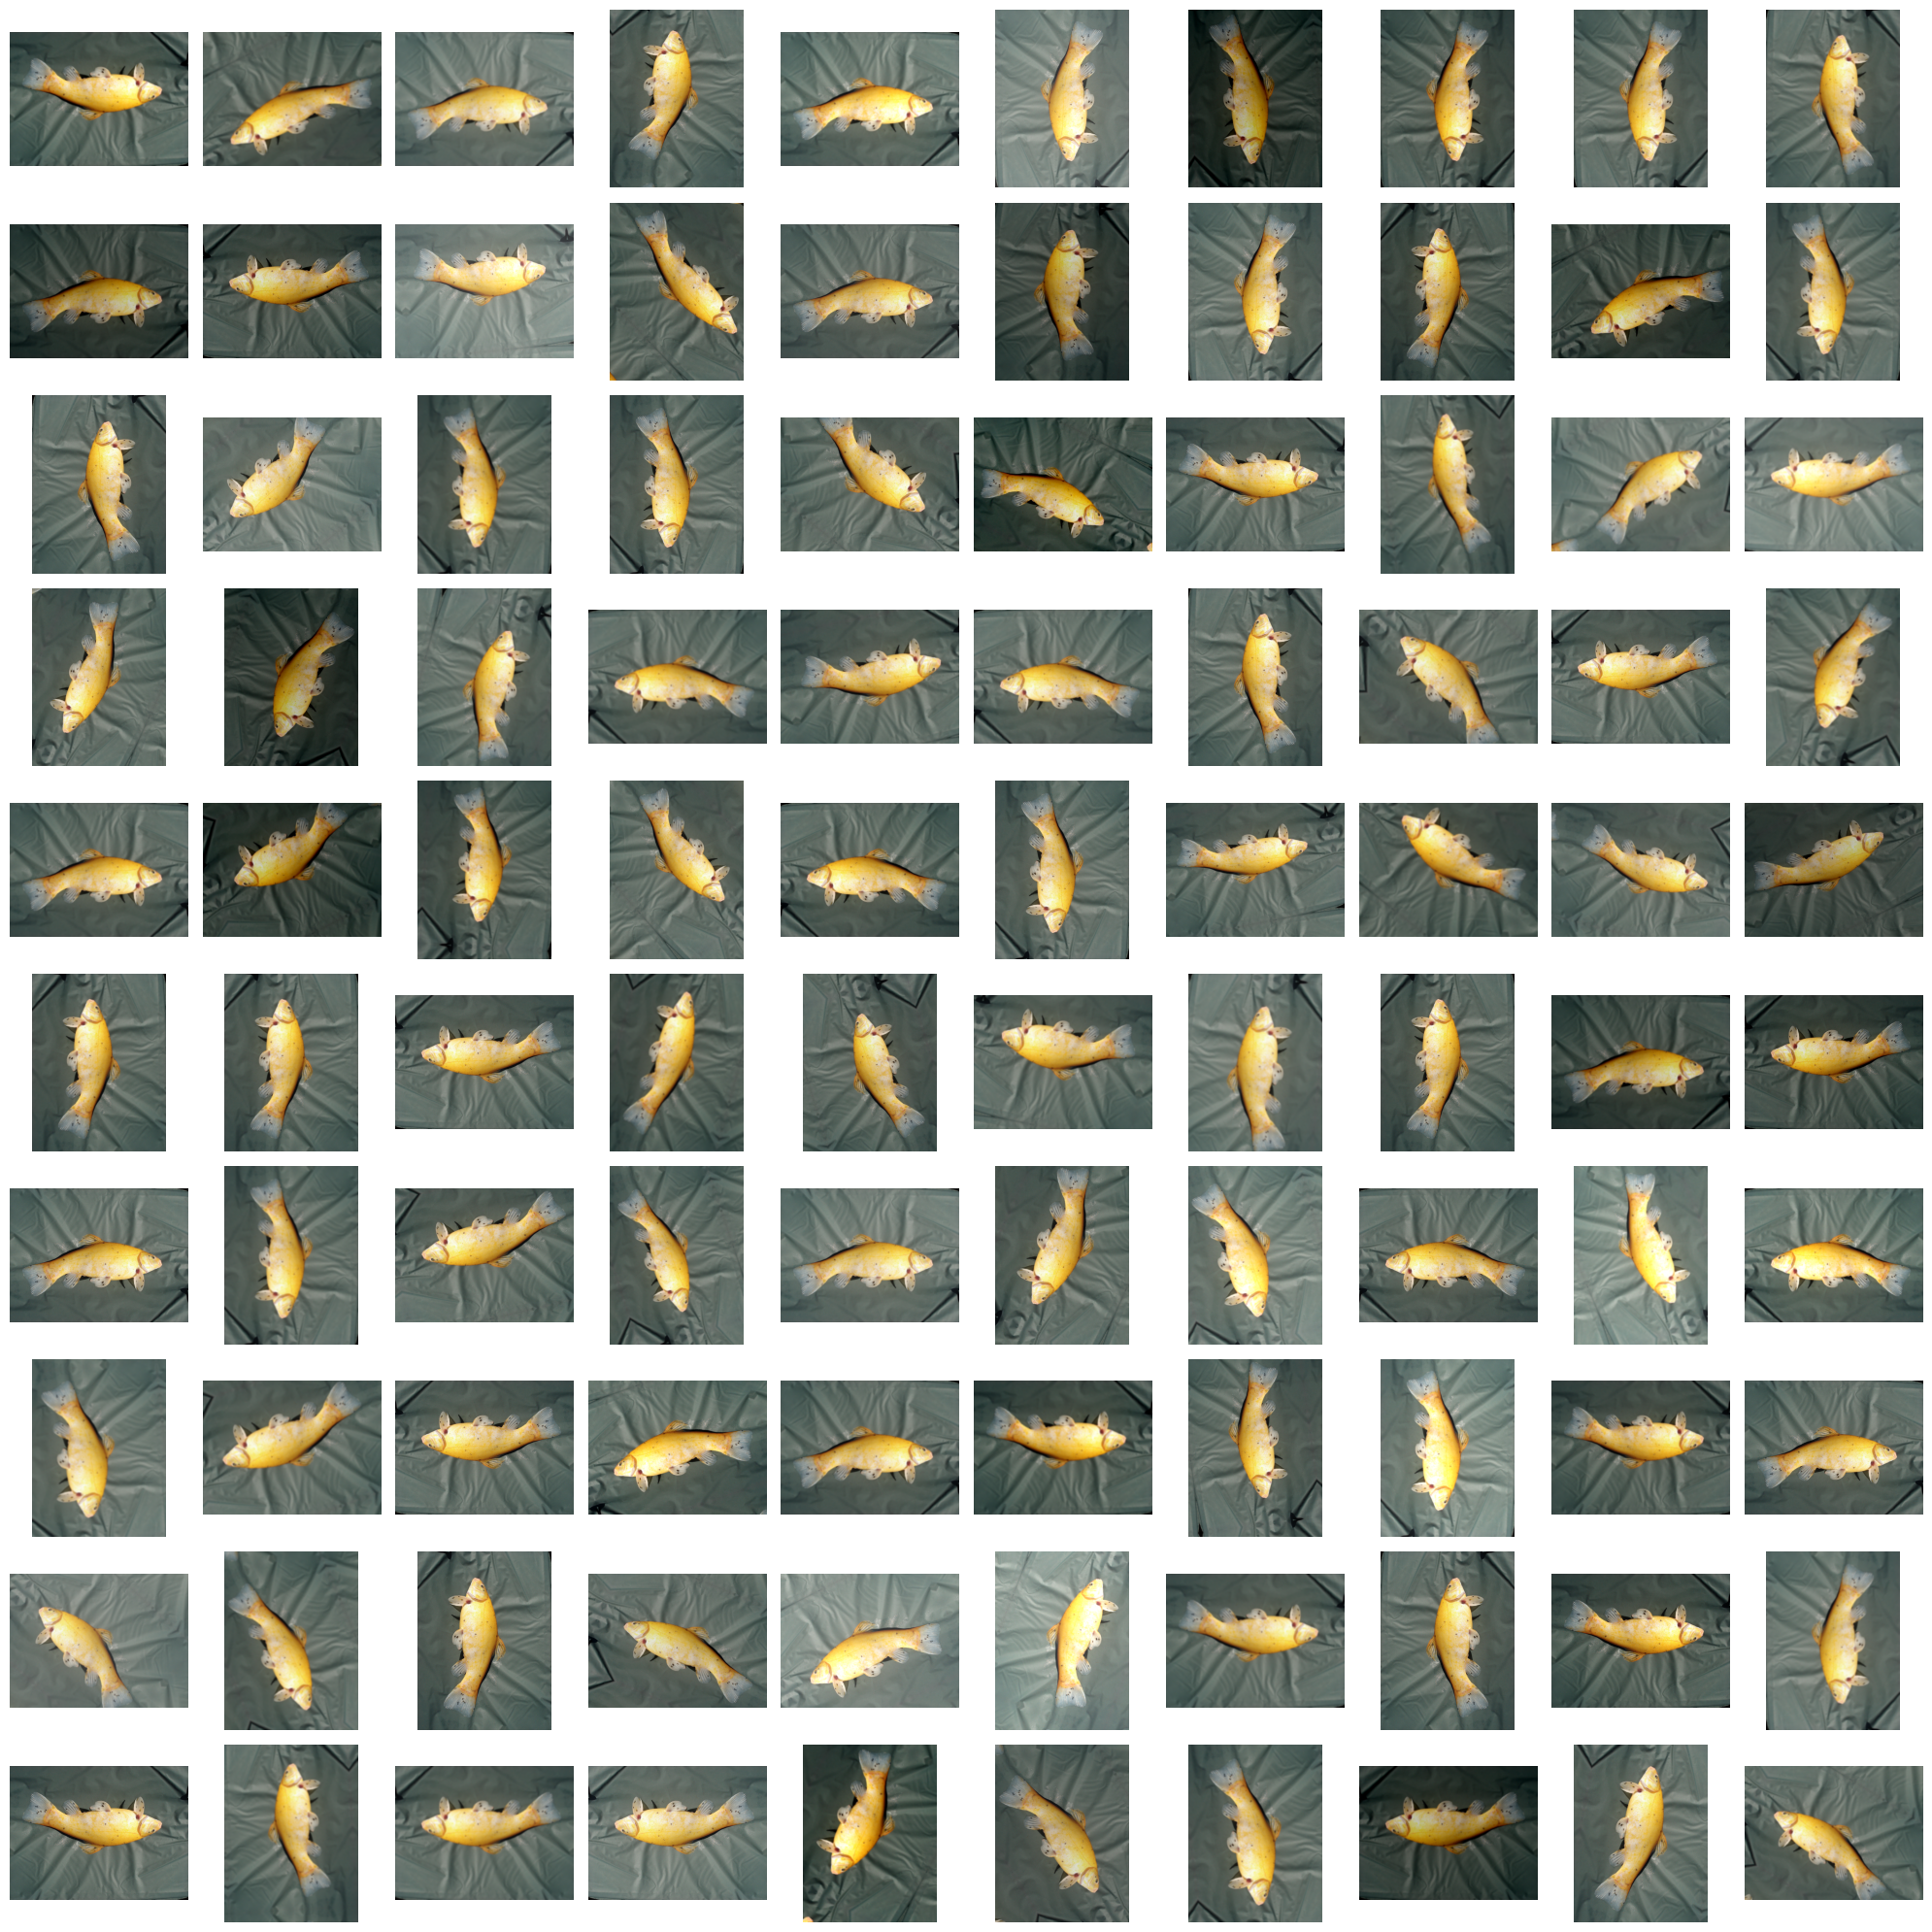

Time taken to generate and visualize 100 variations: 5.28 seconds


In [22]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import random
import time 

start_time = time.time()

image_path = 'n01440764_tench.JPEG'  
image = cv2.imread(image_path)
if image is None:
    print("Error: Could not load image.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = A.Compose([
        A.RandomRotate90(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Transpose(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.RandomGamma(p=0.5),
        A.GaussianBlur(p=0.5),
    ])

    plt.figure(figsize=(20, 20))
    for i in range(100):
        augmented = transform(image=image)
        aug_image = augmented['image']

        plt.subplot(10, 10, i + 1)
        plt.imshow(aug_image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken to generate and visualize 100 variations: {elapsed_time:.2f} seconds")
